# Sales Data Analysis

In this project, we analyze retail sales data to identify top-performing product categories, seasonal trends, and revenue distribution. The goal is to provide actionable insights that could help a business make smarter sales and marketing decisions.


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub

sns.set(style="whitegrid")

In [16]:
path = kagglehub.dataset_download("vivek468/superstore-dataset-final")

In [18]:
data = pd.read_csv(path+"\Sample - Superstore.csv")
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [19]:
data.info()
data.describe()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [21]:
data_clean = data.dropna()
print(f"Rows before: {len(data)}, after cleaning: {len(data_clean)}")

Rows before: 9994, after cleaning: 9994


Category
Technology         836154.0330
Furniture          741999.7953
Office Supplies    719047.0320
Name: Sales, dtype: float64


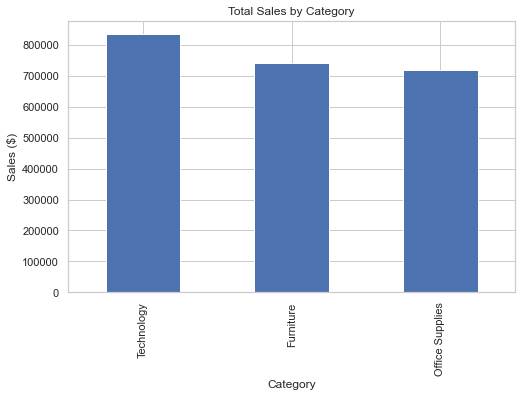

In [26]:
category_sales = data_clean.groupby('Category')['Sales'].sum().sort_values(ascending=False)
print(category_sales)

category_sales.plot(kind='bar', figsize=(8,5), title='Total Sales by Category')
plt.ylabel('Sales ($)')
plt.xlabel('Category')
plt.show()


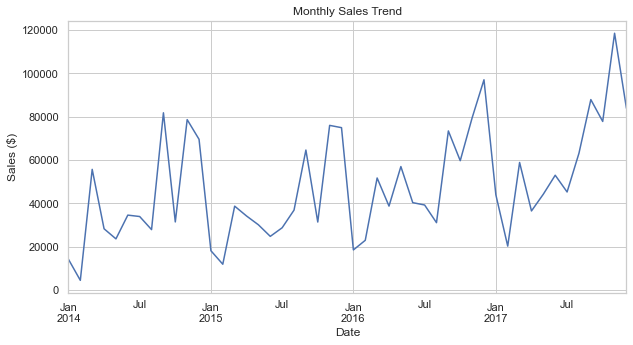

In [25]:
data_clean['Order Date'] = pd.to_datetime(data_clean['Order Date'])

monthly_sales = data_clean.resample('M', on='Order Date')['Sales'].sum()

monthly_sales.plot(figsize=(10,5), title='Monthly Sales Trend')
plt.ylabel('Sales ($)')
plt.xlabel('Date')
plt.show()


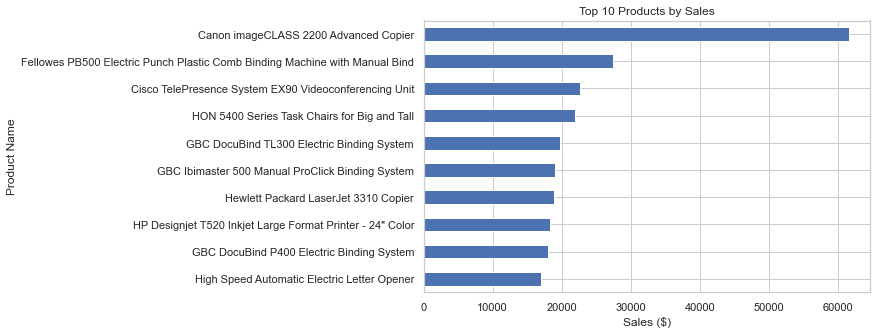

In [24]:
top_products = data_clean.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='barh', figsize=(8,5), title='Top 10 Products by Sales')
plt.xlabel('Sales ($)')
plt.gca().invert_yaxis()
plt.show()


## 📌 Insights

- The most profitable category is Technology
- Monthly sales show a rising trend
- Top products include Canon image CLASS 2000, Fellowes PB500, Cisco TelePresence System EX90
- Opportunities to focus on best-selling categories and months with peak sales

These findings can help businesses make better inventory and marketing decisions.
